In [1]:
!pip install statsmodels 

Text(0.5, 1.0, 'Employment Rates Changes in First 8 months of 2020')

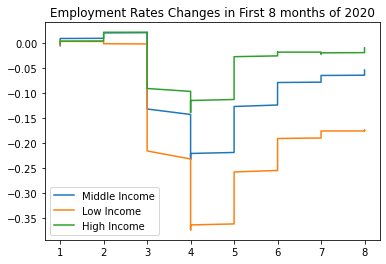

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv("employment_rate (1).csv", parse_dates=[['year', 'month', 'day']], index_col=0)
# 1. Construct the plots for low, middle and high income groups over months.
fig, ax = plt.subplots(1, 1)
ax.plot(df.index.month, df.emp_combined_incmiddle, label="Middle Income")
ax.plot(df.index.month,df.emp_combined_inclow, label="Low Income")
ax.plot(df.index.month,df.emp_combined_inchigh, label="High Income")
ax.legend()
ax.set_title("Employment Rates Changes in First 8 months of 2020")

In [13]:
print(df.head())

                emp_combined  emp_combined_inclow  emp_combined_incmiddle  \
year_month_day                                                              
2020-01-14         -0.004160            -0.003830               -0.005520   
2020-01-15         -0.003010            -0.003050               -0.003820   
2020-01-16         -0.001930            -0.002200               -0.002270   
2020-01-17         -0.000923            -0.001300               -0.000864   
2020-01-18          0.000020            -0.000374                0.000407   

                emp_combined_inchigh  emp_combined_ss40  emp_combined_ss60  \
year_month_day                                                               
2020-01-14                 -0.001770          -0.002410          -0.002850   
2020-01-15                 -0.001380          -0.001810          -0.001760   
2020-01-16                 -0.001040          -0.001240          -0.000758   
2020-01-17                 -0.000716          -0.000679           0.00

In [9]:
from statsmodels.tsa.stattools import *
# 2. Do they exhibit significant trend or seasonality?
result = adfuller(df.emp_combined)
print(f"Test Statistic: {result[0]}, p-value: {result[1]}")# ADF statistic and p-value.
"""
Null Hypothesis-> There is a unit root 
p-value
In this case, the test statistic is -3.09969
p-value is 0.0265 > 0.01 for 1% significance level, 
Hence null hypothesis that there is a unit root cannot be rejected 
so the data is non-stationary implying the presence of trend/seasonality
In the event of higher significance level, 
e.g. 5%, the null hypothesis will then be rejected and hence stationary.
"""

Test Statistic: -3.0996902082469, p-value: 0.0265761229562077


'\nNull Hypothesis-> There is a unit root \np-value\nIn this case, the test statistic is -3.09969\np-value is 0.0265 > 0.01 for 1% significance level, \nHence null hypothesis that there is a unit root cannot be rejected \nso the data is non-stationary implying the presence of trend/seasonality\nIn the event of higher significance level, \ne.g. 5%, the null hypothesis will then be rejected and hence stationary.\n'

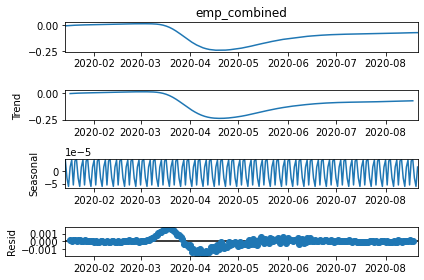

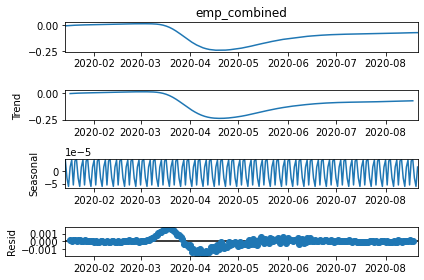

In [10]:
decomposed = seasonal_decompose(df.emp_combined, model="additive")
decomposed.plot() # The following plots display the trend and seasonal components found in emp_combined variable.

In [11]:
# Which month has the lowest employment rate?
df[df.emp_combined == df.emp_combined.min()].index.month_name() # April

Index(['April'], dtype='object', name='year_month_day')

In [12]:
# For emp_combined variable, which decomposition method is more appropriate? Why?
# decomposed = seasonal_decompose(df.emp_combined, model="multiplicative")
# decomposed.plot() 
# The above will result in error due to the presence of negative values.
# Hence, additive model is better in this case.